In [1]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('../')

from austen import Logger
from pathlib import Path
import joblib
import networkx as nx
import matplotlib.pyplot as plt
import random

from bike.model.graph import Graph
from bike.util.snap import snap_vertices, get_snapped_ids
from bike.util.preprocessing import smooth_graph, remove_snapped, update_edges

In [3]:
VERTICES_BIKES_PATH = Path('../data/vertices_bikes.csv')
EDGES_BIKES_PATH = Path('../data/edges_bikes.csv')

VERTICES_ROADS_PATH = Path('../data/vertices_roads.csv')
EDGES_ROADS_PATH = Path('../data/edges_roads.csv')

logger = Logger(Path('log/preprocessing'))

graph_bikes_obj = Graph(VERTICES_BIKES_PATH, EDGES_BIKES_PATH)
graph_bikes = graph_bikes_obj.nx_graph

graph_roads_obj = Graph(VERTICES_ROADS_PATH, EDGES_ROADS_PATH)
graph_roads = graph_roads_obj.nx_graph

In [4]:
pos_bikes = {int(id): (v.x, v.y) for id, v in graph_bikes_obj.vertices_by_id.items()}
pos_roads = {int(id): (v.x, v.y) for id, v in graph_roads_obj.vertices_by_id.items()}

In [5]:
# plt.figure(figsize=(20,15))
# nx.draw(graph_roads, pos_roads, node_size=5, width=1)

In [6]:
# graph_bikes_obj = snap_vertices(graph_roads_obj, graph_bikes_obj)

In [7]:
snapped_obj = joblib.load('../data/bikes_snapped.joblib')
pos_snapped = {int(id): (v.x, v.y) for id, v in snapped_obj.vertices_by_id.items()}
graph_snapped = snapped_obj.nx_graph

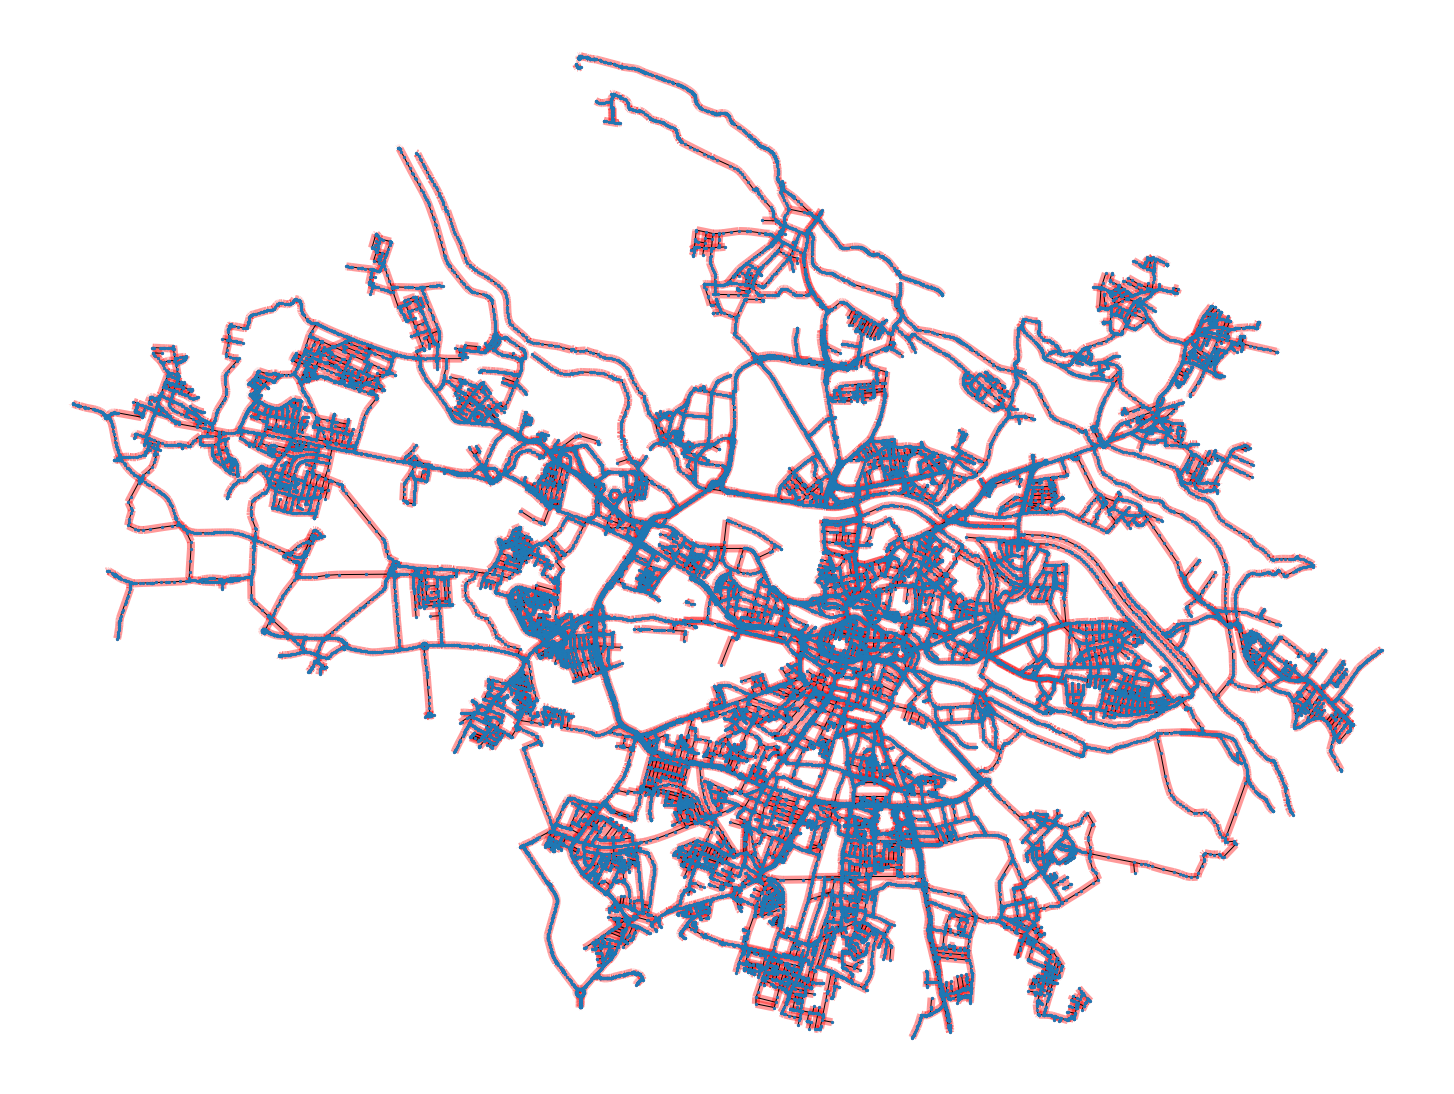

In [8]:
plt.figure(figsize=(20,15))
nx.draw(graph_bikes, pos_bikes, node_size=5, width=8, alpha=0.4, node_color='r', edge_color='r')
nx.draw(graph_snapped, pos_snapped, node_size=5, width=1)
plt.savefig('snapped_bikes.png', dpi=600)
plt.show()

In [9]:
snapped_ids = get_snapped_ids(snapped_obj)
len(snapped_ids)

75092

In [10]:
# graph_roads_obj = smooth_graph(graph_roads_obj, 134, snapped_ids)
# joblib.dump(graph_roads_obj, '../data/smoothed_roads.joblib')

100%|██████████████████████████████████████████████████████████████████████| 239223/239223 [00:00<00:00, 248931.95it/s]


['../data/smoothed_roads.joblib']

In [11]:
# graph_roads_obj = remove_snapped(graph_roads_obj, snapped_ids)
# joblib.dump(graph_roads_obj, '../data/possible_paths.joblib')

100%|█████████████████████████████████████████████████████████████████████████| 199139/199139 [11:56<00:00, 278.09it/s]


['../data/possible_paths.joblib']

In [3]:
# graph_roads_obj = update_edges(graph_roads_obj)
# joblib.dump(graph_roads_obj, '../data/possible_paths.joblib')

158901it [00:00, 434280.57it/s]


['../data/possible_paths.joblib']

In [2]:
graph_roads_obj = joblib.load('../data/possible_paths.joblib')

In [12]:
len(graph_roads_obj.nx_graph.edges)

158901

In [13]:
len(graph_roads_obj.nx_graph.nodes)

155308

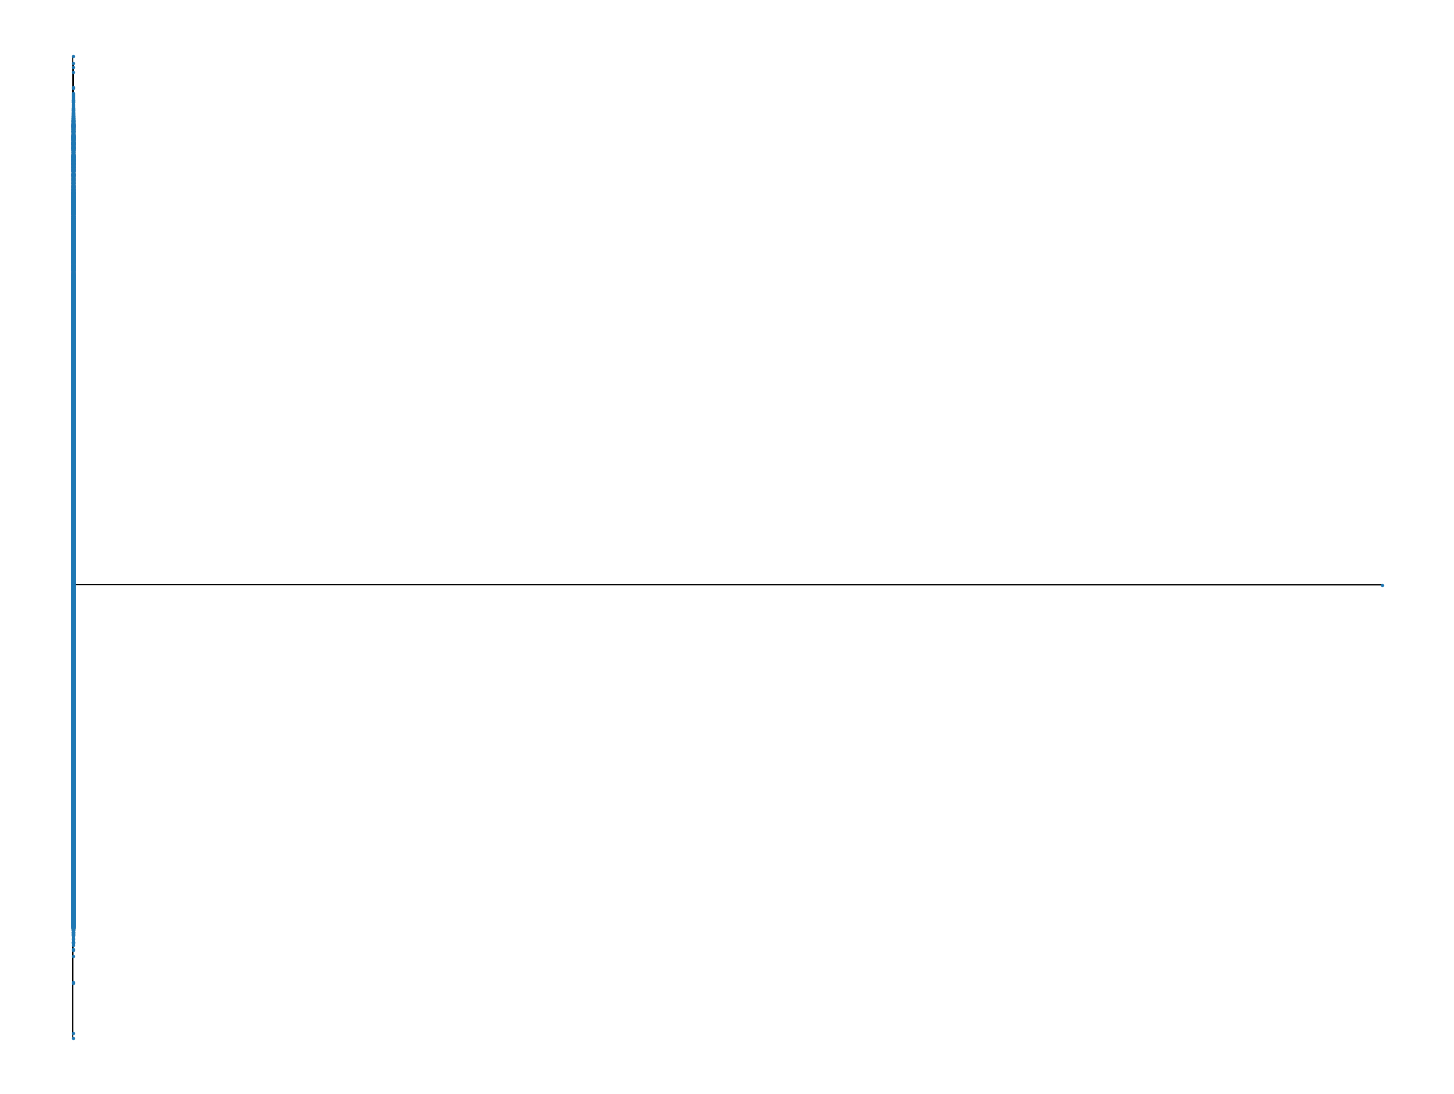

In [15]:
plt.figure(figsize=(20,15))
nx.draw(graph_roads_obj.nx_graph, pos_roads, node_size=5, width=1)
plt.savefig('possible_paths0.png', dpi=600)
plt.show()

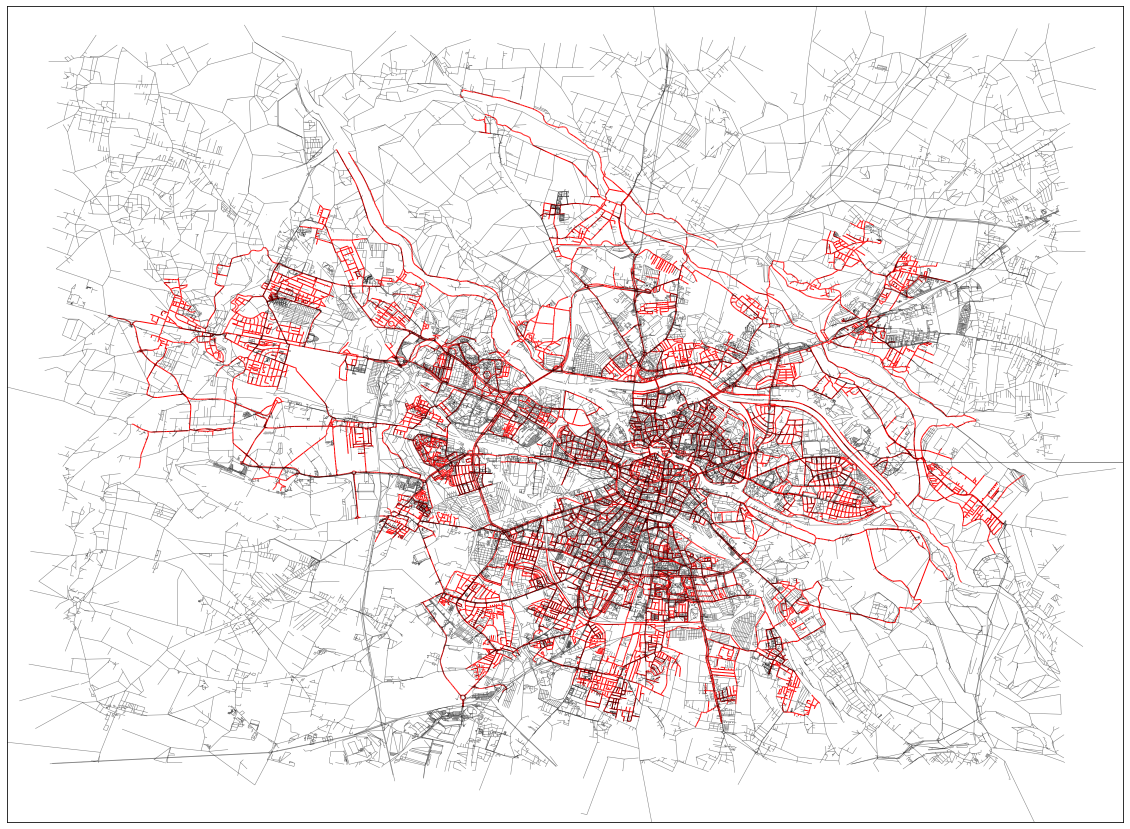

In [77]:
plt.figure(figsize=(20,15))
nodes = random.sample(graph_roads_obj.nx_graph.nodes, 10000)
nx.draw_networkx_nodes(graph_roads_obj.nx_graph, pos_roads, nodes, node_size=0)
nx.draw_networkx_edges(graph_snapped, pos_snapped, edge_color='r', alpha=1, width=1)
nx.draw_networkx_edges(graph_roads_obj.nx_graph, pos_roads, alpha=0.5, width=0.5)
plt.savefig('possible_paths.png', dpi=600)
plt.show()

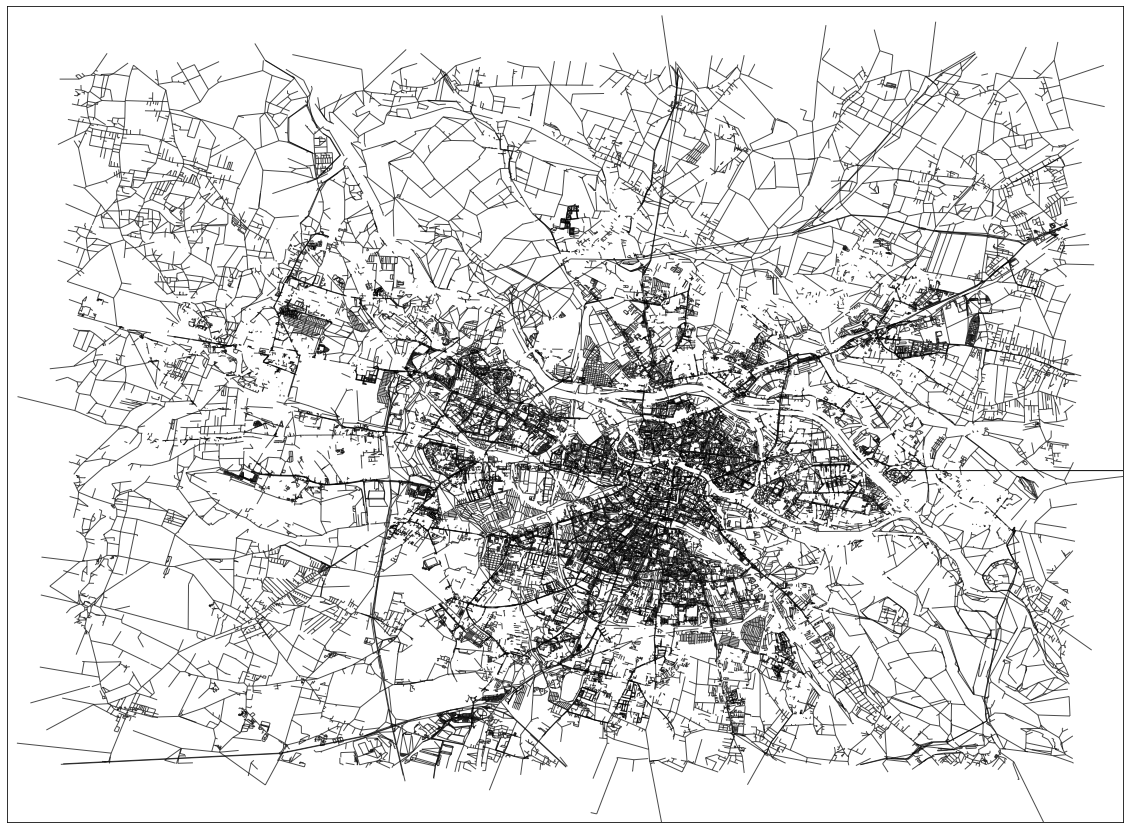

In [76]:
plt.figure(figsize=(20,15))
nodes = random.sample(graph_roads_obj.nx_graph.nodes, 10000)
nx.draw_networkx_nodes(graph_roads_obj.nx_graph, pos_roads, nodes, node_size=0)
nx.draw_networkx_edges(graph_roads_obj.nx_graph, pos_roads, alpha=0.7)
plt.savefig('roads.png', dpi=600)
plt.show()